**Nombre:** Manuela <br>
**Apellidos:** Larrea Gómez 
# **Práctica 1 Python: Ejercicio 3**
<hr>

## Requerimientos del sistema

* Versión de Python: 3.11.4 o superior
* Versión del módulo Numpy: 1.25.2 o superior
* Versión del módulo Pandas: 2.0.1 o superior
* Versión del módulo Matplotlib: 3.7.2 o superior
* Versión del módulo Openpyxl: 3.1.2 o superior

In [1]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

pd.options.display.float_format = '{:,.2f}'.format   # Formato float pandas


### Importación de dataset

In [2]:
df_salarios = pd.read_csv('./dat/ds_salaries.csv', sep = ";")

In [3]:
df_salarios

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<hr>

### 1. (0.1) Número de observaciones incluidas en el set de datos. 

In [4]:
n,m = df_salarios.shape
print(n)

607


<hr>

### 2. (0.2) Listado de variables (y sus tipos) incluidas en el set de datos

In [5]:
df_salarios.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

<hr>

### 3. (0.2) Estadísticos básicos sólo de las variables numéricas del set de datos. 

In [6]:
"""
 La variable remote_ratio, a pesar de estar predefinida como numérica, logra identificarse que es una variable categórica 
 dadas las definiciones en el data card de Kaggle.
 
 Donde: 0 -> Sin trabajo remoto (menos del 20%). 50 -> Parcialmente remoto. 100 -> Totalmente remoto (más del 80%)
 
 Por lo tanto, se opta por su redefinición a String.

 """

df_salarios= df_salarios.astype({'remote_ratio': str })
df_salarios.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [7]:
df_salarios.describe()

,work_year,salary,salary_in_usd
count,607.00,607.00,607.00
mean,"2,021.41","324,000.06","112,297.87"
std,0.69,"1,544,357.49","70,957.26"
min,"2,020.00","4,000.00","2,859.00"
25%,"2,021.00","70,000.00","62,726.00"
50%,"2,022.00","115,000.00","101,570.00"
75%,"2,022.00","165,000.00","150,000.00"
max,"2,022.00","30,400,000.00","600,000.00"


<hr>

### 4. (0.5) Tablas de frecuencia sólo de las variables categóricas del set de datos. Obtén 3 insights de estos primeros 4 apartados.

In [8]:
for col in df_salarios.columns:
    if df_salarios[col].dtype == 'object':
        tabla_frecuencia = df_salarios[col].value_counts()
        print(f"\nTabla de Frecuencia para {col}:\n{tabla_frecuencia}")


Tabla de Frecuencia para experience_level:
experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

Tabla de Frecuencia para employment_type:
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

Tabla de Frecuencia para job_title:
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                  

### Insights identificados:

1. El 25% de los empleados gana 150k dólares anuales o más.
2. Más de la mitad de los empleados tienen su residencia en los Estados Unidos.
3. Más del 90% de los empleados tienen contrato de tiempo completo.

<hr>

### 5. (0.25) ¿Dónde se ofrece el menor salario? ¿Con qué nombre se oferta? ¿Y el mayor salario? 

In [15]:
menor_salario = df_salarios.loc[df_salarios['salary_in_usd'].idxmin(), ['job_title','company_location', 'salary_in_usd']]
print(f"En {menor_salario['company_location']} se ofrece el menor salario, con {menor_salario['salary_in_usd']} dólares anuales, para el cargo de {menor_salario['job_title']}")

En MX se ofrece el menor salario, con 2859 dólares anuales, para el cargo de Data Scientist


In [17]:
mayor_salario = df_salarios.loc[df_salarios['salary_in_usd'].idxmax(), ['job_title','company_location', 'salary_in_usd']]
print(f"En {mayor_salario['company_location']} se ofrece el mayor salario, con {mayor_salario['salary_in_usd']} dólares anuales, para el cargo de {mayor_salario['job_title']}")

En US se ofrece el mayor salario, con 600000 dólares anuales, para el cargo de Principal Data Engineer


<hr>

### 6. (0.5) ¿Qué continente tiene el mayor salario medio? ¿Y el menor? Aquí puedes utilizar el catálogo que se adjunta a la práctica: cat_ISO_3166.xlsx

In [20]:
df_catalogo = pd.read_excel("./dat/cat_ISO_3166.xlsx")

In [21]:
df_catalogo

,name,ISO_3166,region
0,Afghanistan,AF,Asia
1,Åland Islands,AX,Europe
2,Albania,AL,Europe
3,Algeria,DZ,Africa
4,American Samoa,AS,Oceania
...,...,...,...
244,Wallis and Futuna,WF,Oceania
245,Western Sahara,EH,Africa
246,Yemen,YE,Asia
247,Zambia,ZM,Africa


In [22]:
df_salaries_region = df_catalogo.merge(df_salarios, left_on='ISO_3166', right_on="company_location", how='right').rename(columns={'region': 'company_region'})
df_salaries_region = df_salaries_region.drop(columns=['name', 'ISO_3166'])
df_salaries_region

,company_region,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,Europe,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,Asia,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,Europe,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,Americas,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,Americas,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Americas,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,Americas,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,Americas,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,Americas,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [23]:
salario_continente = df_salaries_region.groupby(['company_region'])['salary_in_usd'].mean()
print(f'El continente con menor salario medio es: {salario_continente.idxmin()}. El continente con mayor salario medio es: {salario_continente.idxmax()}')

El continente con menor salario medio es: Africa. El continente con mayor salario medio es: Americas


### 7. (0.25) ¿Cómo evolucionan los salarios según el nivel de experiencia?

La tendencia identificada entre la experiencia y el salario es proporcional: A mayor experiencia, mayor salario.


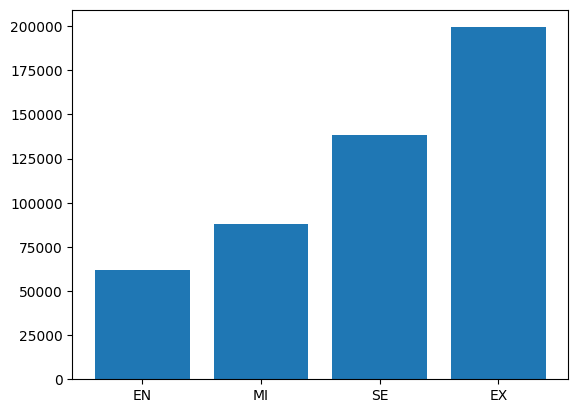

In [24]:
media_salarios = (df_salarios.groupby(['experience_level'])['salary_in_usd'].mean()).sort_values()
plt.bar(media_salarios.index, (media_salarios.values))
plt.show
print('La tendencia identificada entre la experiencia y el salario es proporcional: A mayor experiencia, mayor salario.')

### 8. (0.5) ¿Los salarios se modifican según el ratio de trabajo en remoto? ¿Qué sucede si desagregamos por nivel de experiencia?

<function matplotlib.pyplot.show(close=None, block=None)>

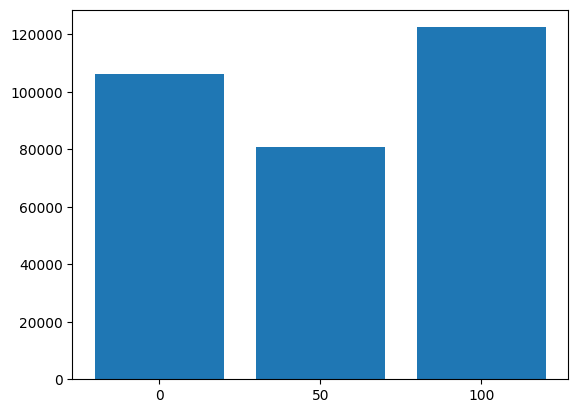

In [25]:
media_salarios_remoto = (df_salarios.groupby(['remote_ratio'])['salary_in_usd'].mean())
media_salarios_remoto = media_salarios_remoto.sort_index(key=lambda x: pd.to_numeric(x))

plt.bar(media_salarios_remoto.index, (media_salarios_remoto.values))
plt.show

Se observa la siguiente tendencia: <br>
salary_in_usd(remote_ratio = 50) < salary_in_usd(remote_ratio = 0) < salary_in_usd(remote_ratio=100).

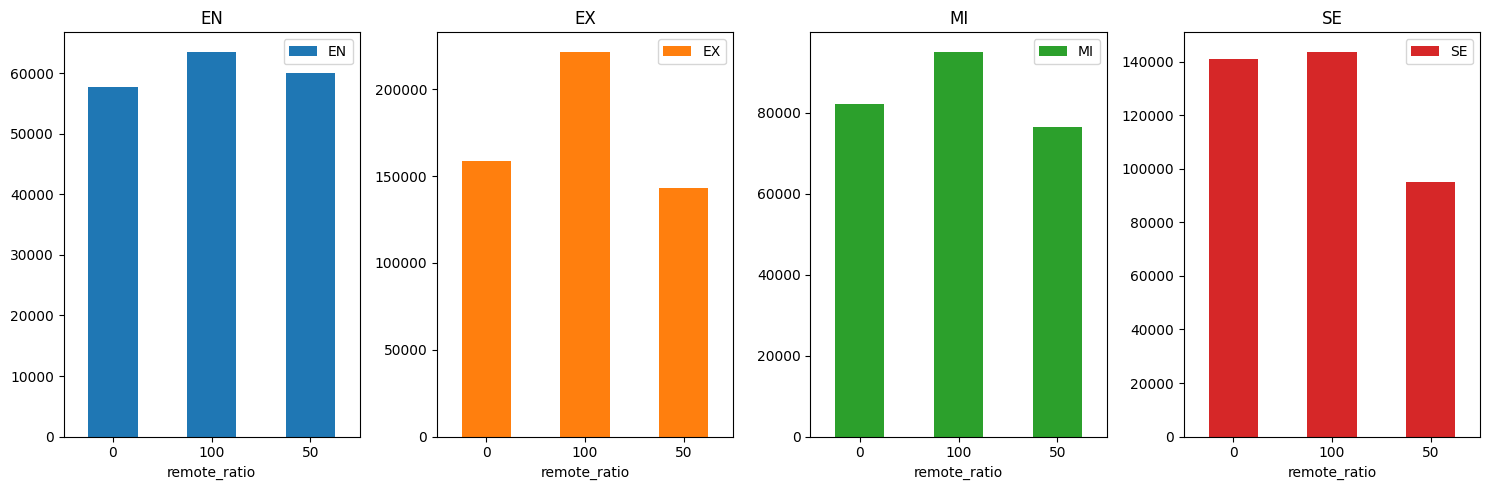

In [26]:
media_salarios_experiencia = (df_salarios.groupby(['remote_ratio','experience_level'])['salary_in_usd'].mean()).sort_index(level='experience_level')
ax = media_salarios_experiencia.unstack(level=1).plot(kind='bar', subplots=True, rot=0, figsize=(15, 5), layout=(1, 4))
plt.tight_layout()

Al desagregar por tipo de experiencia, se observa que la tendencia se mantiene respecto a la tendencia analizada sin desagregar. No obstante, para el nivel de experiencia EN - Entry Level, se evidencia una correspondencia proporcional, es decir:<br>
salary_in_usd(remote_ratio = 0) < salary_in_usd(remote_ratio = 50) < salary_in_usd(remote_ratio=100).

### (0.5) ¿Cuáles son las 3 posiciones con mayor número de ofertas disponibles? ¿Y en las que se ofrece mayor salario?

In [27]:
top_3_ofertas = df_salaries_region.groupby(['job_title'])['job_title'].count().sort_values(ascending=False)
print ('Las 3 posiciones con mayor número de ofertas disponibles son:')
top_3_ofertas.head(3)

Las 3 posiciones con mayor número de ofertas disponibles son:


job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [28]:
top_3_salarios= df_salaries_region.groupby(['job_title'])['salary_in_usd'].max().sort_values(ascending=False)
print ('Las 3 posiciones en las que se ofrece el mayor salario son:')
top_3_salarios.head(3)

Las 3 posiciones en las que se ofrece el mayor salario son:


job_title
Principal Data Engineer    600000
Financial Data Analyst     450000
Research Scientist         450000
Name: salary_in_usd, dtype: int64

### 10. (0.5) Realiza un análisis de la situación de los salarios en España respecto al resto de países

In [29]:
df_salaries_region['salary_in_usd'].describe()

count       607.00
mean    112,297.87
std      70,957.26
min       2,859.00
25%      62,726.00
50%     101,570.00
75%     150,000.00
max     600,000.00
Name: salary_in_usd, dtype: float64

In [30]:
df_salarios_spain = df_salaries_region.loc[df_salarios['employee_residence']=='ES']
df_salarios_spain['salary_in_usd'].describe()


count        15.00
mean     57,593.40
std      28,395.03
min      10,354.00
25%      41,371.00
50%      49,461.00
75%      71,444.50
max     130,800.00
Name: salary_in_usd, dtype: float64

Las observaciones de España representan únicamente el 2.47% de las observaciones totales.<br>
La media salarial de España se encuentra 49k dólares anuales por debajo de la media salarial anual del resto de países. <br>
La observación con salario mínimo anual en España es 3.62 veces mayor que la observación con salario mínimo anual del resto de países.

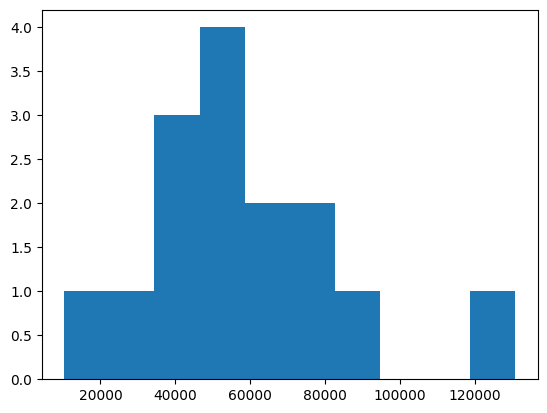

In [31]:
plt.hist(df_salarios_spain['salary_in_usd'])
plt.show()

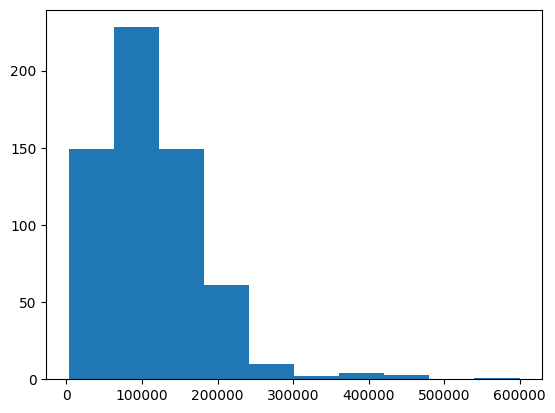

In [32]:
plt.hist(df_salaries_region['salary_in_usd'])
plt.show()

Respecto a la distribución de los salarios en España, se evidencia que los salarios más comunes son entre 40000 y 60000 USD anuales. Mientras que el comportamiento de los salarios anuales más comunes del resto de países son cercanos a 100k USD anuales.
Esto posiciona a la media salarial española por debajo de la media salarial del resto de países.

La observación del máximo salario en España tiene un valor de 130,800.00 USD anual. Este salario está cercano a la media salarial global, la cual equivale a 112,297.87 USD anuales.

<BarContainer object of 57 artists>

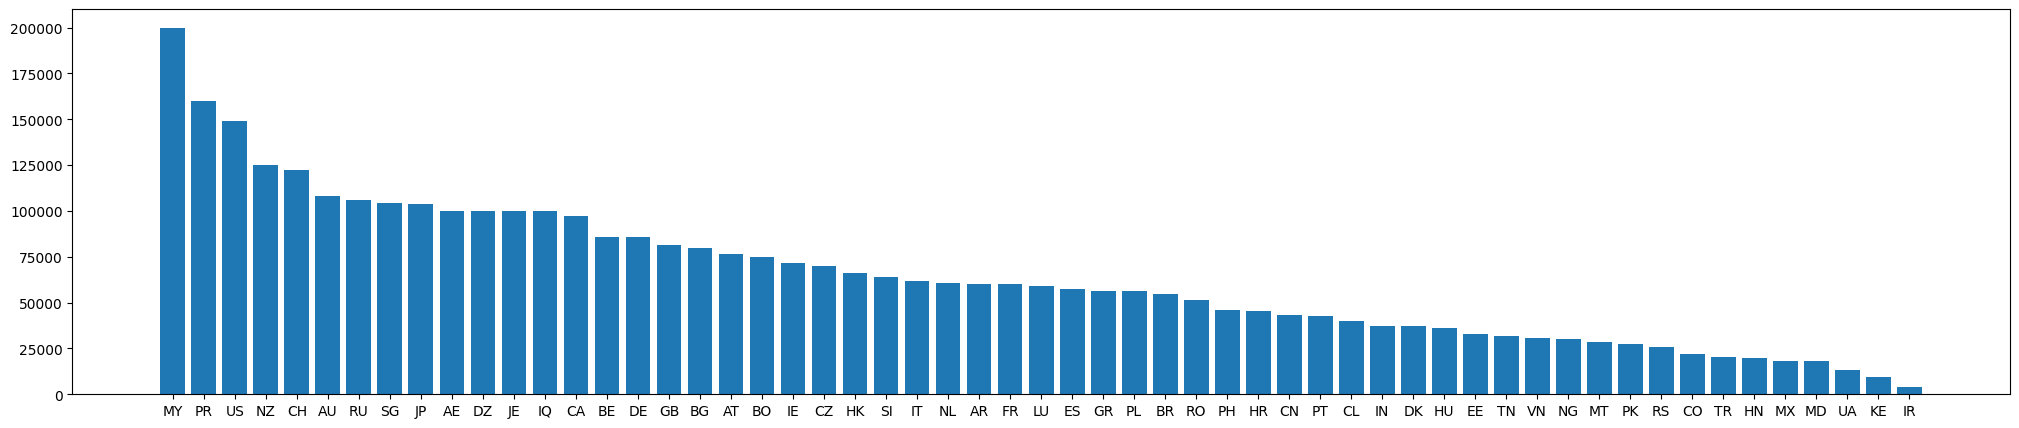

In [33]:
salario_paises = df_salaries_region.groupby(['employee_residence'])['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(25,5))
plt.bar(salario_paises.index, salario_paises.values)

Finalmente, haciendo una comparativa global, se puede observar que España se posiciona aproximadamente en el centro de la distribución de salarios anuales promedios del resto de países. 